In [47]:
import numpy as np
import scipy

# generate data
n_training_data = 100
n_test_data = 10000

class GaussianGenerator:
    def __init__(self, n_dim, n_classes, class_prob):
        self.mean = np.zeros([n_classes, n_dim])
        self.covariance = np.zeros([n_classes, n_dim, n_dim])
        for c in range(n_classes):
            self.mean[c] = np.random.normal(n_dim)
            self.covariance[c] = scipy.stats.wishart.rvs(n_dim, np.identity(n_dim))
        self.n_dim = n_dim
        self.n_classes = n_classes
        self.class_prob = class_prob
    def generate(self, n_data):
        X = np.zeros([n_data, n_dim])
        y = np.zeros(n_data)
        for t in range(n_data):
            c = np.random.choice(range(self.n_classes), p = self.class_prob)
            X[t] = scipy.stats.multivariate_normal.rvs(self.mean[c], self.covariance[c])
            y[t] = c
        return X, y

n_dim = 2
n_classes = 2
class_prob = [0.8, 0.2]
generator = GaussianGenerator(n_dim, n_classes, class_prob)

train_X, train_y = generator.generate(n_training_data)
test_X, test_y = generator.generate(n_test_data)


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.metrics import accuracy_score


In [49]:
test_score = np.zeros(99)
train_score = np.zeros(99)
for n_neighbors in range(1,100):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(train_X, train_y)
    y = clf.predict(train_X)
    train_score[n_neighbors-1] = accuracy_score(y, train_y)
    y = clf.predict(test_X)
    test_score[n_neighbors-1] = accuracy_score(y, test_y)



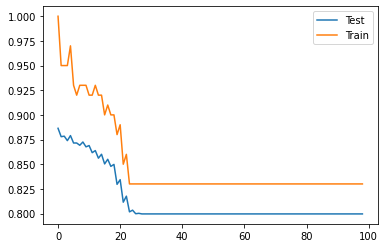

In [50]:
plt.plot(test_score)
plt.plot(train_score)
plt.legend(["Test", "Train"])